## Handwriting Recognition - Pashto

### Data

- Training, Validation & Testing [Pashto Isolated Alphabets and Numerals](https://www.kaggle.com/datasets/abdulbasitkh/pashto-isolated-alphabetss-and-numerals) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

### Data preporcessing

In [2]:
# load data
data = pd.read_csv('../input/pashto-isolated-alphabetss-and-numerals/pashto_alpha_num_hw.csv')
data

,alif,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.988,0.989,0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997
0,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,183
2,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37864,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37865,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37866,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37867,las,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Columns: 1025 entries, alif to 0.997
dtypes: int64(1024), object(1)
memory usage: 296.1+ MB


In [4]:
# get classes/pashto letters (first column i.e alif contains labels)
classes = data['alif'].unique()
classes

array(['alif', 'be', 'pe', 'te', 'ṭe', 'se', 'jīm', 'če', 'he', 'xe',
       'ce', 'źim', 'dāl', 'ḍāl', 'zāl', 're', 'ṛe', 'ze', 'že', 'ẓ̌ey',
       'sīn', 'šīn', 'x̌īn', 'swād', 'zwād', 'twe', 'zwe', 'ayn', 'ğayn',
       'fe', 'qāf', 'kāf', 'gāf', 'lām', 'mīm', 'nūn', 'ṇūn', 'wāw',
       'gərda he', 'klaka ye', 'pasta ye', 'nārīna ye', 'x̌əźīna ye',
       'fāiliya ye', 'yaw', 'dwa', 'dre', 'celor', 'pinza', 'shpazh',
       'owa', 'ata', 'nah', 'las'], dtype=object)

In [5]:
# classes hashmap
classes = {i:l for i, l in enumerate(classes)}
classes

{0: 'alif',
 1: 'be',
 2: 'pe',
 3: 'te',
 4: 'ṭe',
 5: 'se',
 6: 'jīm',
 7: 'če',
 8: 'he',
 9: 'xe',
 10: 'ce',
 11: 'źim',
 12: 'dāl',
 13: 'ḍāl',
 14: 'zāl',
 15: 're',
 16: 'ṛe',
 17: 'ze',
 18: 'že',
 19: 'ẓ̌ey',
 20: 'sīn',
 21: 'šīn',
 22: 'x̌īn',
 23: 'swād',
 24: 'zwād',
 25: 'twe',
 26: 'zwe',
 27: 'ayn',
 28: 'ğayn',
 29: 'fe',
 30: 'qāf',
 31: 'kāf',
 32: 'gāf',
 33: 'lām',
 34: 'mīm',
 35: 'nūn',
 36: 'ṇūn',
 37: 'wāw',
 38: 'gərda he',
 39: 'klaka ye',
 40: 'pasta ye',
 41: 'nārīna ye',
 42: 'x̌əźīna ye',
 43: 'fāiliya ye',
 44: 'yaw',
 45: 'dwa',
 46: 'dre',
 47: 'celor',
 48: 'pinza',
 49: 'shpazh',
 50: 'owa',
 51: 'ata',
 52: 'nah',
 53: 'las'}

In [6]:
# get images (x) & labels (y)
# the first column contains labels, other are the flattened array of 32x32 image pixels
y = data.values[:, 0]
x = data.values[:, 1:]

In [7]:
# reshape images 
x = np.reshape(x, (x.shape[0], 32, 32, 1))  

In [8]:
# encode labels 
# label encoder fits the labels lexicographically (sorts them alphabetically)
# but here we want to assign values to labels according to the classes hashmap
# i.e 0 for alif, 1 for be etc
# use classes_ to customize mapping

le = LabelEncoder().fit(y)
le.classes_ = np.array(list(classes.values()))
y = le.transform(y)
y

array([ 0,  0,  0, ..., 53, 53, 53])

In [9]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [10]:
# training & testing generators
datagen_train = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=False,
                                   fill_mode='nearest')
datagen_test = ImageDataGenerator(rescale=1./255)

In [11]:
data_train = datagen_train.flow(x_train, y_train, subset='training', 
                                batch_size=64, shuffle=True)
data_valid = datagen_train.flow(x_train, y_train, subset='validation',
                                batch_size=64, shuffle=True)
data_test = datagen_test.flow(x_test, y_test, batch_size=1, shuffle=False)

### Model Develpment & Training

In [12]:
model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
                MaxPooling2D(2, 2),
                Conv2D(32, (3, 3), activation='relu'),
                MaxPooling2D(2, 2),
                Flatten(), 
                Dense(512, activation='relu'), 
                Dense(54, activation='softmax')])    # 54 = total pashto letters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 512)               5

In [13]:
# compile model
model.compile(optimizer=Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# fit model 
history = model.fit(data_train, 
                    epochs=30,
                    validation_data=data_valid,
                    verbose=2)

Epoch 1/30
427/427 - 24s - loss: 2.4401 - accuracy: 0.3004 - val_loss: 1.6603 - val_accuracy: 0.4677 - 24s/epoch - 57ms/step
Epoch 2/30
427/427 - 23s - loss: 1.3603 - accuracy: 0.5562 - val_loss: 1.1760 - val_accuracy: 0.6089 - 23s/epoch - 53ms/step
Epoch 3/30
427/427 - 23s - loss: 1.0314 - accuracy: 0.6558 - val_loss: 0.9671 - val_accuracy: 0.6821 - 23s/epoch - 54ms/step
Epoch 4/30
427/427 - 23s - loss: 0.8968 - accuracy: 0.7010 - val_loss: 0.8570 - val_accuracy: 0.7143 - 23s/epoch - 53ms/step
Epoch 5/30
427/427 - 23s - loss: 0.7933 - accuracy: 0.7347 - val_loss: 0.7771 - val_accuracy: 0.7400 - 23s/epoch - 53ms/step
Epoch 6/30
427/427 - 23s - loss: 0.7189 - accuracy: 0.7568 - val_loss: 0.7658 - val_accuracy: 0.7453 - 23s/epoch - 54ms/step
Epoch 7/30
427/427 - 23s - loss: 0.6893 - accuracy: 0.7689 - val_loss: 0.7497 - val_accuracy: 0.7554 - 23s/epoch - 53ms/step
Epoch 8/30
427/427 - 23s - loss: 0.6462 - accuracy: 0.7827 - val_loss: 0.6570 - val_accuracy: 0.7861 - 23s/epoch - 53ms/step


### Model Evaluation

In [15]:
# # loss and accuracy
eval_model = model.evaluate(data_test, return_dict=True)
eval_model

3787/3787 [==============================] - 9s 2ms/step - loss: 0.3956 - accuracy: 0.8880


{'loss': 0.3956427574157715, 'accuracy': 0.8880380392074585}

Text(0.5, 1.0, 'Training & Validation Loss')

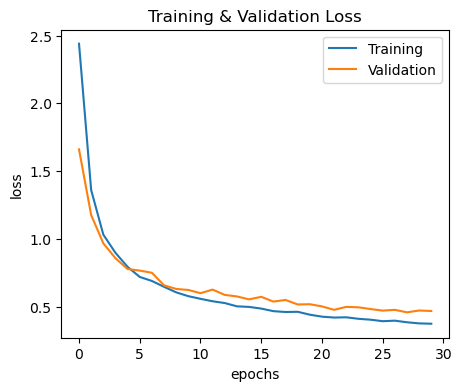

In [16]:
# training and validation loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.title('Training & Validation Loss')

### Testing an image

In [17]:
# get an image and its actual label/class
# the batch size in data_test is 1, each batch contains 1 sample 
# each sample is a 2d nested array. index 0= image features(x), index 1= label(y)
test_img = data_test[0][0]          # data_test[i][x] i=ith sample, x=features
test_label = data_test[0][1][0]     # data_test[i][y] i=ith sample, y=label array

In [18]:
# predict label
test_label_pred = np.argmax(model.predict(test_img))

1/1 [==============================] - 0s 137ms/step


Text(0.5, 1.0, 'actual:ḍāl, predicted:ḍāl')

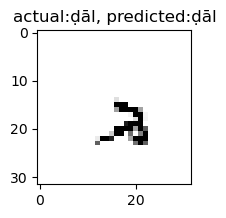

In [19]:
# plot results
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(32, 32), cmap='binary')
plt.title(f'actual:{classes[test_label]}, predicted:{classes[test_label_pred]}')

### Model Predictions

1/1 [==============================] - 0s 22ms/step


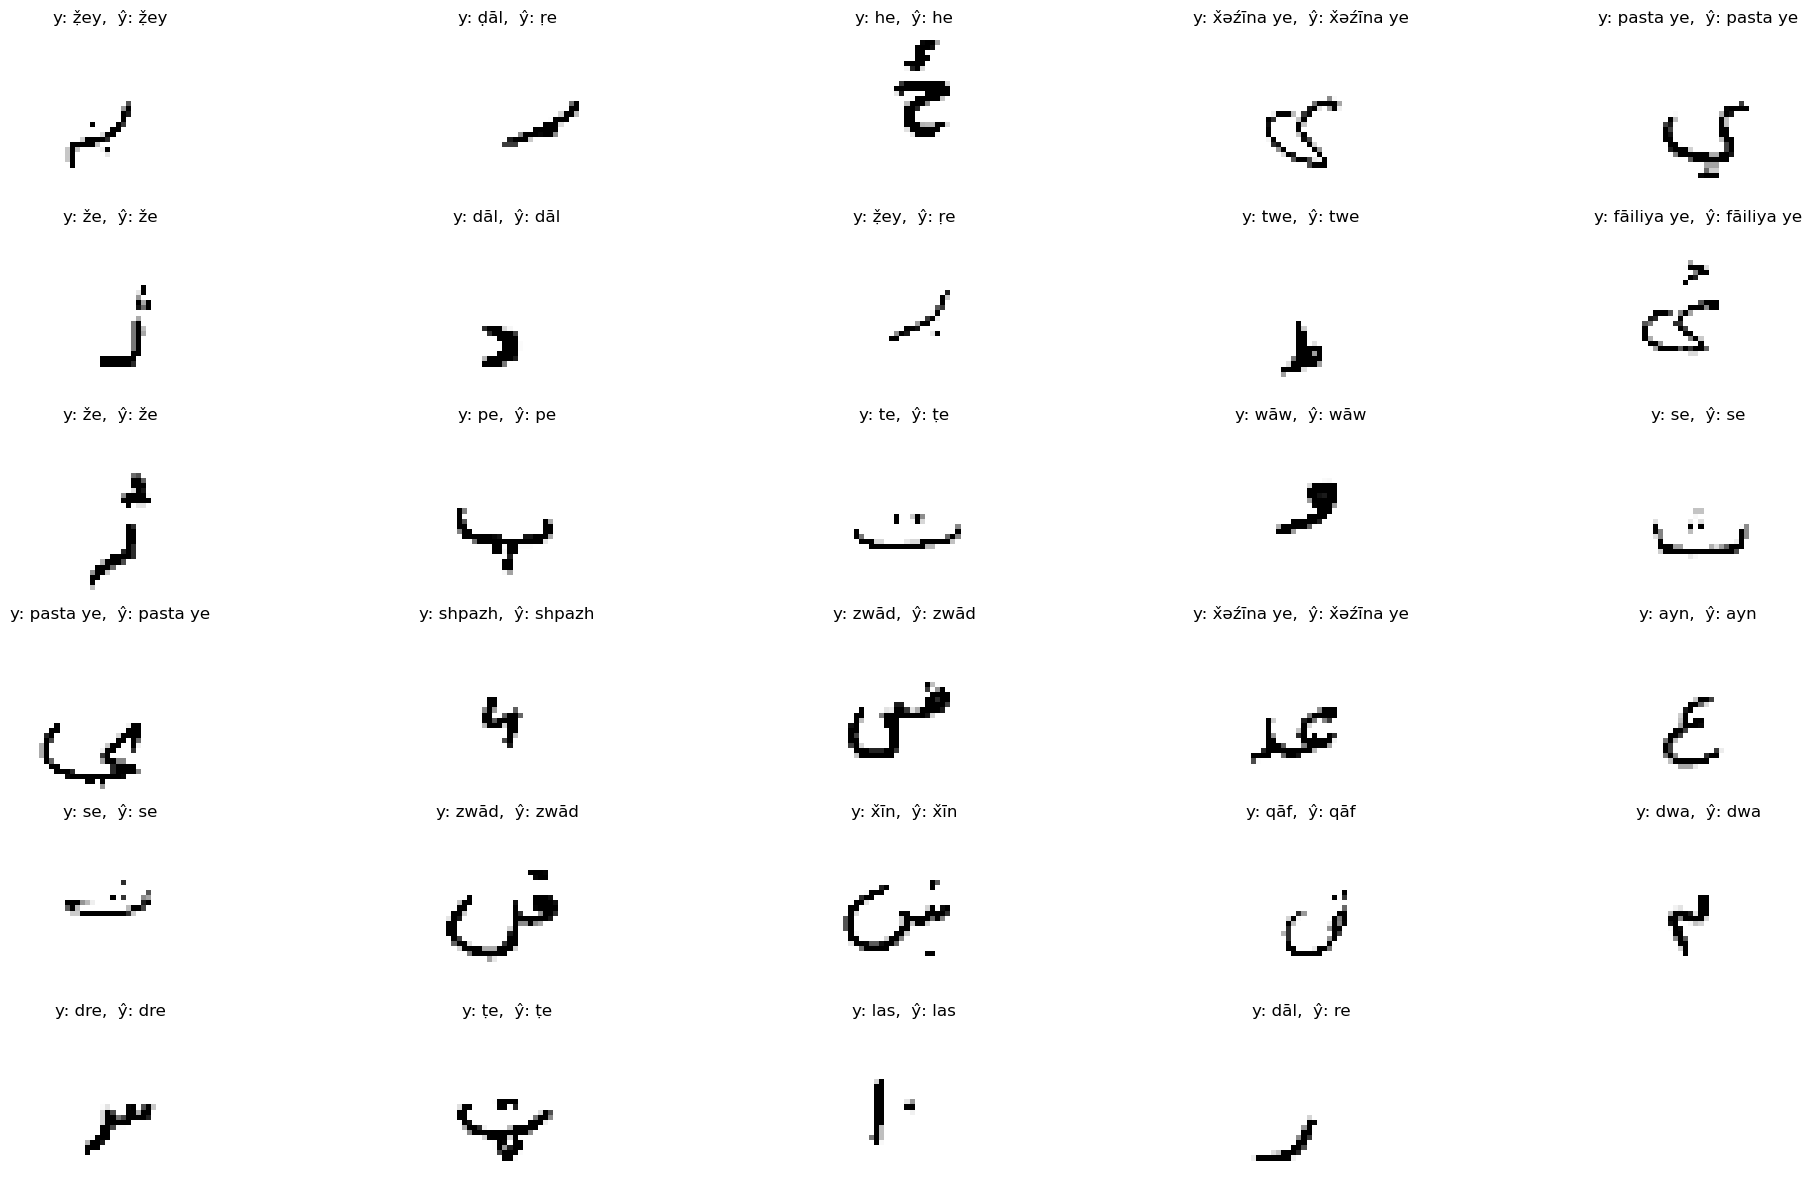

In [20]:
plt.figure(figsize=(20, 20))
for i in range(1, 30):
    x = data_test[i][0]
    y = data_test[i][1][0]
    y_pred = np.argmax(model.predict(x))
    plt.subplot(10, 5, i)
    plt.imshow(x.reshape(32, 32), cmap='binary')
    plt.title(f"y: {classes[y]},  y\u0302: {classes[y_pred]}") # y=actual, ŷ=pred
    plt.axis('off')
plt.tight_layout()
plt.show()